## Preparing the webscrapping page lists.

* Creating a list of web pages belong to specific cities and search items
* Creating an empty dataframe to drop the data inside, breaking the for loop in soup by returning None objects and save time.
* Checking the dataframe after each list run, to verify if the list were completed or not, by comparing the row count of the dataframe with the list index, if an list were interrupped earlier, re-run the scrapping from the new index in the web page list

In [55]:
#set up environment
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import time

import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [1]:
# #set up Victoria List
# url_list = []
# for page in range (1, 350):
#     temp_url = "https://au.indeed.com/jobs?q=data+$20,000&l=Victoria&start=%s" % ((page-1)*10)
#     #conducting a request of the stated URL above:
#     content = requests.get(temp_url)
#     #specifying a desired format of “page” using the html parser - this allows python to 
#     #read the various components of the page, rather than treating it as one long string.
#     page_soup = BeautifulSoup(markup=content.text,features='lxml')
#     #printing soup in a more structured tree 
#     #format that makes for easier reading
#     for div in page_soup.find_all(name='div', 
#                                   attrs={'class':
#                                          'jobsearch-SerpJobCard'}):
#         url_list.append(div['data-jk'])
                        
# len(url_list)

In [ ]:
#Set up Sydney List
url_list2 = []
for page in range (1, 300):
    temp_url = "https://au.indeed.com/jobs?q=data+$20,000&l=Sydney&start=%s" % ((page-1)*10)
    #conducting a request of the stated URL above:
    content = requests.get(temp_url)
    #specifying a desired format of “page” using the html parser - this allows python to 
    #read the various components of the page, rather than treating it as one long string.
    page_soup = BeautifulSoup(markup=content.text,features='lxml')
    #printing soup in a more structured tree 
    #format that makes for easier reading
    for div in page_soup.find_all(name='div', 
                                  attrs={'class':
                                         'jobsearch-SerpJobCard'}):
        url_list2.append(div['data-jk'])
len(url_list2)

In [ ]:
#Set up Brisbane list
url_list3 = []
for page in range (1, 300):
    temp_url = "https://au.indeed.com/jobs?q=data+$20,000&l=Brisbane&start=%s" % ((page-1)*10)
    time.sleep(0.2)
    #conducting a request of the stated URL above:
    content = requests.get(temp_url)
    #specifying a desired format of “page” using the html parser - this allows python to 
    #read the various components of the page, rather than treating it as one long string.
    page_soup = BeautifulSoup(markup=content.text,features='lxml')
    #printing soup in a more structured tree 
    #format that makes for easier reading
    for div in page_soup.find_all(name='div', 
                                  attrs={'class':
                                         'jobsearch-SerpJobCard'}):
        url_list3.append(div['data-jk'])
len(url_list3)

In [ ]:
#Set up ACT job list
url_list4 = []
for page in range (1, 300):
    temp_url = "https://au.indeed.com/jobs?q=data+$20,000&l=Canberra&start=%s" % ((page-1)*10)
    time.sleep(0.2)
    #conducting a request of the stated URL above:
    content = requests.get(temp_url)
    #specifying a desired format of “page” using the html parser - this allows python to 
    #read the various components of the page, rather than treating it as one long string.
    page_soup = BeautifulSoup(markup=content.text,features='lxml')
    #printing soup in a more structured tree 
    #format that makes for easier reading
    for div in page_soup.find_all(name='div', 
                                  attrs={'class':
                                         'jobsearch-SerpJobCard'}):
        url_list4.append(div['data-jk'])
len(url_list4)

In [ ]:
#Check List content
url_list4[:10]

In [ ]:
# https://au.indeed.com/viewjob?jk=68235e154957be93

In [ ]:
# def get_url(soup):
#     urls = []
#     for div in soup.find_all(name='div', attrs={'class':'jobsearch-SerpJobCard'}):
#         print(div['data-jk'])
#         #         for link in div.find_all(name='a'):
# #         print(div)

# get_url(soup)

In [ ]:
#Set up data frame for all cities, each data frame will have 
#8000 rows, first one for melbourne and sydney, second one for the rest
city_set = ['Melbourne','Sydney','Brisbane','Peth']
columns = ['job_title','location','work_type','company_name','company_rating', 'salary','desc']
sample_df = pd.DataFrame(columns = columns)
sample_df['job_title'] = ['e' for number in range(8000)]

In [ ]:
#Set up data frame 2 for Brisbane
sample_df2 = pd.DataFrame(columns = columns)
sample_df2['job_title'] = ['e' for number in range(8000)]

In [ ]:
#check dataframe shape
sample_df.shape

In [ ]:
# #scraping code:
# # job_title = []
# # location = []
# # work_type = []
# # company_name = []
# # company_rating = []
# # salary = []
# # desc = []
# for i,k in enumerate(url_list):
#     temp_url2 = 'https://au.indeed.com/viewjob?jk=' + k
#     time.sleep(1)  #ensuring at least 1 second between page grabs
#     content2 = requests.get(temp_url2)
#     soup2 = BeautifulSoup(content2.text, 'lxml', from_encoding='utf-8')
#     for item in soup2.find_all(name='h3', attrs={'class':'icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title'}):
#         #print(item.text)
#          job_title.append(item.text)

# job_title

In [ ]:
# sample_df['job_title'] = job_title

In [ ]:
#Check dataframe
sample_df.head()

In [ ]:
#Scrapping for Melbourne
for i,k in enumerate(url_list):
    temp_url2 = 'https://au.indeed.com/viewjob?jk=' + k
    time.sleep(0.2)  #ensuring at least 1 second between page grabs
    content2 = requests.get(temp_url2)
    soup2 = BeautifulSoup(content2.text, 'lxml', from_encoding='utf-8')
    jt = soup2.find(name='h3', attrs={'class':'icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title'})
    if jt is not None:
        sample_df.job_title[i] = jt.text
        cn = soup2.find(name='div',attrs={'class':'icl-u-lg-mr--sm icl-u-xs-mr--xs'})
        if cn is not None:
            sample_df.company_name[i] = cn.text
        else:
            sample_df.company_name[i] = url_list[i]
        rt = soup2.find(name='meta',attrs={'itemprop':'ratingValue'})
        if rt is not None:
            sample_df.company_rating[i] = rt["content"]
        lc = soup2.find(name='span',attrs={'class':'jobsearch-JobMetadataHeader-iconLabel'})
        if lc is not None:
            if "$" in lc:
                sample_df.salary = lc.text
            else:
                sample_df.location[i] = lc.text
            metalist = soup2.find_all(name='span',attrs={'class':'jobsearch-JobMetadataHeader-iconLabel'})
            for x in range(1,len(metalist)):
                if "$" in metalist[x].text:
                    sample_df.salary[i] = metalist[x].text
                else:
                    sample_df.work_type[i] = metalist[x].text
        desc = soup2.find(name='div',attrs={'class':'jobsearch-jobDescriptionText'})
        if desc is not None:
            sample_df.desc[i] = desc.text

#     functions = soup2.find_all(name='span', attrs={'class':'jobsearch-JobMetadataHeader-iconLabel'})
#     print(functions)
#     print(len(functions))
#     for t in range(len(functions)):
#         if functions[t].text.find('$'):
#             sample_df.salary[i] = functions[t].text
#         elif 
            
    
#     if len(functions)==0:
#         work_type.append('NA')
#     else:
#         for item in functions:
#             print(item)
    
        
#sample_df['job_title'] = job_title

In [ ]:
#Review the breaks in the table and update the query
rowcount = len(sample_df[~(sample_df['job_title']=='e')].index)
rowcount

#### sample_df.location.value_counts()

In [ ]:
#Scrapping for Sydney
for j,k in enumerate(url_list2[260:]):
    temp_url3 = 'https://au.indeed.com/viewjob?jk=' + k
    time.sleep(0.2)  #ensuring at least 1 second between page grabs
    content2 = requests.get(temp_url3)
    soup2 = BeautifulSoup(content2.text, 'lxml', from_encoding='utf-8')
    i = j + rowcount
    jt = soup2.find(name='h3', attrs={'class':'icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title'})
    if jt is not None:
        sample_df.job_title[i] = jt.text
        cn = soup2.find(name='div',attrs={'class':'icl-u-lg-mr--sm icl-u-xs-mr--xs'})
        if cn is not None:
            sample_df.company_name[i] = cn.text
        else:
            sample_df.company_name[i] = url_list2[j]
        rt = soup2.find(name='meta',attrs={'itemprop':'ratingValue'})
        if rt is not None:
            sample_df.company_rating[i] = rt["content"]
        lc = soup2.find(name='span',attrs={'class':'jobsearch-JobMetadataHeader-iconLabel'})
        if lc is not None:
            if "$" in lc:
                sample_df.salary = lc.text
            else:
                sample_df.location[i] = lc.text
            metalist = soup2.find_all(name='span',attrs={'class':'jobsearch-JobMetadataHeader-iconLabel'})
            for x in range(1,len(metalist)):
                if "$" in metalist[x].text:
                    sample_df.salary[i] = metalist[x].text
                else:
                    sample_df.work_type[i] = metalist[x].text
        desc = soup2.find(name='div',attrs={'class':'jobsearch-jobDescriptionText'})
        if desc is not None:
            sample_df.desc[i] = desc.text


In [ ]:
#Review the breaks in the table and update the query
# sample_df[~(sample_df['job_title']=='e')]
sample_df = sample_df.dropna(subset=['salary'])
sample_df

In [ ]:
#     #specifying row num for index of job posting in dataframe
#     num = (len(sample_df) + 1) 
#     #creating an empty list to hold the data for each posting
#     job_post = [] 
#     #append city name
#     job_post.append(city) 
#     #grabbing job title
#     for a in div.find_all(name=”a”, attrs={“data-tn-element”:”jobTitle”}):
#       job_post.append(a[“title”]) 
#     #grabbing company name
#     company = div.find_all(name=”span”, attrs={“class”:”company”}) 
#     if len(company) > 0: 
#       for b in company:
#         job_post.append(b.text.strip()) 
#     else: 
#       sec_try = div.find_all(name=”span”, attrs={“class”:”result-link-source”})
#       for span in sec_try:
#         job_post.append(span.text) 
#     #grabbing location name
#     c = div.findAll(‘span’, attrs={‘class’: ‘location’}) 
#     for span in c: 
#       job_post.append(span.text) 
#     #grabbing summary text
#     d = div.findAll(‘span’, attrs={‘class’: ‘summary’}) 
#       for span in d:
#         job_post.append(span.text.strip()) 
#     #grabbing salary
#     try:
#       job_post.append(div.find(‘nobr’).text) 
#     except:
#       try:
#         div_two = div.find(name=”div”, attrs={“class”:”sjcl”}) 
#         div_three = div_two.find(“div”) 
#         job_post.append(div_three.text.strip())
#       except:
#         job_post.append(“Nothing_found”) 
#     #appending list of job post info to dataframe at index num
#     sample_df.loc[num] = job_post

In [ ]:
#Drop duplicate based on desc and reset index
sample_df = sample_df.drop_duplicates(subset='desc').reset_index(drop=True)
sample_df

In [ ]:
#Save file to local drive
sample_df.to_csv('jobdata1.csv', encoding='utf-8')

In [ ]:
#check final shape
sample_df.shape

In [ ]:
#scrapping for brisbane
for i,k in enumerate(url_list3):
    temp_url2 = 'https://au.indeed.com/viewjob?jk=' + k
    time.sleep(0.2)  #ensuring at least 1 second between page grabs
    content2 = requests.get(temp_url2)
    soup2 = BeautifulSoup(content2.text, 'lxml', from_encoding='utf-8')
    jt = soup2.find(name='h3', attrs={'class':'icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title'})
    if jt is not None:
        sample_df2.job_title[i] = jt.text
        cn = soup2.find(name='div',attrs={'class':'icl-u-lg-mr--sm icl-u-xs-mr--xs'})
        if cn is not None:
            sample_df2.company_name[i] = cn.text
        else:
            sample_df2.company_name[i] = url_list3[i]
        rt = soup2.find(name='meta',attrs={'itemprop':'ratingValue'})
        if rt is not None:
            sample_df2.company_rating[i] = rt["content"]
        lc = soup2.find(name='span',attrs={'class':'jobsearch-JobMetadataHeader-iconLabel'})
        if lc is not None:
            if "$" in lc:
                sample_df2.salary = lc.text
            else:
                sample_df2.location[i] = lc.text
            metalist = soup2.find_all(name='span',attrs={'class':'jobsearch-JobMetadataHeader-iconLabel'})
            for x in range(1,len(metalist)):
                if "$" in metalist[x].text:
                    sample_df2.salary[i] = metalist[x].text
                else:
                    sample_df2.work_type[i] = metalist[x].text
        desc = soup2.find(name='div',attrs={'class':'jobsearch-jobDescriptionText'})
        if desc is not None:
            sample_df2.desc[i] = desc.text

In [ ]:
rowcount2 = len(sample_df2[~(sample_df2['job_title']=='e')].index)
rowcount2

In [ ]:
#scrapping for brisbane
for t,k in enumerate(url_list4):
    temp_url2 = 'https://au.indeed.com/viewjob?jk=' + k
    time.sleep(0.2)  #ensuring at least 1 second between page grabs
    i = t + rowcount2
    content2 = requests.get(temp_url2)
    soup2 = BeautifulSoup(content2.text, 'lxml', from_encoding='utf-8')
    jt = soup2.find(name='h3', attrs={'class':'icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title'})
    if jt is not None:
        sample_df2.job_title[i] = jt.text
        cn = soup2.find(name='div',attrs={'class':'icl-u-lg-mr--sm icl-u-xs-mr--xs'})
        if cn is not None:
            sample_df2.company_name[i] = cn.text
        else:
            sample_df2.company_name[i] = url_list4[t]
        rt = soup2.find(name='meta',attrs={'itemprop':'ratingValue'})
        if rt is not None:
            sample_df2.company_rating[i] = rt["content"]
        lc = soup2.find(name='span',attrs={'class':'jobsearch-JobMetadataHeader-iconLabel'})
        if lc is not None:
            if "$" in lc:
                sample_df2.salary = lc.text
            else:
                sample_df2.location[i] = lc.text
            metalist = soup2.find_all(name='span',attrs={'class':'jobsearch-JobMetadataHeader-iconLabel'})
            for x in range(1,len(metalist)):
                if "$" in metalist[x].text:
                    sample_df2.salary[i] = metalist[x].text
                else:
                    sample_df2.work_type[i] = metalist[x].text
        desc = soup2.find(name='div',attrs={'class':'jobsearch-jobDescriptionText'})
        if desc is not None:
            sample_df2.desc[i] = desc.text


In [ ]:
#check how many rows the dataframe has been populated
sample_df2.shape
sample_df2[~(sample_df2['job_title']=='e')]

In [ ]:
sample_df2 = sample_df2.dropna(subset=['salary'])
sample_df2

In [ ]:
sample_df2 = sample_df2.drop_duplicates(subset='desc').reset_index(drop=True)

In [ ]:
sample_df2 = sample_df2.drop(columns='Unnamed: 0')
sample_df2

In [ ]:
sample_df2.to_csv('jobdata2.csv', encoding='utf-8')

In [3]:
sample_df = pd.read_csv('jobdata1.csv')
sample_df2 = pd.read_csv('jobdata2.csv')

In [4]:
final_job_list = [sample_df, sample_df2]

In [5]:
final_job = pd.concat(final_job_list, sort=False)

In [6]:
#final_job = final_job.drop(columns='Unnamed: 0')
final_job.location.value_counts()

Canberra ACT                              133
Brisbane QLD                              121
Sydney NSW                                 97
Melbourne VIC                              93
Sydney NSW 2000                            18
Parkville VIC                              16
Queanbeyan NSW 2620                        12
Geelong VIC                                11
Brisbane QLD 4000                           9
Melbourne VIC 3000                          9
Brisbane Central Business District QLD      9
Macquarie University NSW 2109               8
Melbourne City Centre VIC                   8
Canberra ACT 2600                           8
Sydney Central Business District NSW        8
St Lucia QLD                                7
St Leonards NSW                             7
Parramatta NSW                              7
North Sydney NSW                            5
City of Boroondara VIC                      5
Victoria                                    4
Melbourne VIC 3001                

In [ ]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(final_job)

In [ ]:
profile

In [7]:
final_job.salary.value_counts()

$50,000 - $55,000 a year      18
$60,000 - $70,000 a year      13
$55,000 a year                11
$80,000 a year                10
$25 - $30 an hour             10
$30 an hour                    8
$70,000 a year                 7
$26 an hour                    7
$50,000 - $60,000 a year       6
$70,000 - $90,000 a year       6
$80,000 - $100,000 a year      6
$55,000 - $65,000 a year       6
$51.50 an hour                 6
$65,000 a year                 6
$50,000 a year                 6
$72,083 - $97,812 a year       6
$120,000 a year                5
$60,000 a year                 5
$80,669 - $92,150 a year       5
$60,000 - $80,000 a year       5
$30 - $35 an hour              5
$50,000 - $70,000 a year       5
$40 an hour                    4
$97,203 - $115,429 a year      4
$89,250 a year                 4
$55,000 - $60,000 a year       4
$100 - $120 an hour            4
$25 - $35 an hour              4
$52,493 - $67,410 a year       4
$28 an hour                    4
          

In [ ]:
url_list5 = []
for page in range (1, 300):
    temp_url = "https://au.indeed.com/jobs?q=data+$20,000&l=Perth&start=%s" % ((page-1)*10)
    time.sleep(0.2)
    #conducting a request of the stated URL above:
    content = requests.get(temp_url)
    #specifying a desired format of “page” using the html parser - this allows python to 
    #read the various components of the page, rather than treating it as one long string.
    page_soup = BeautifulSoup(markup=content.text,features='lxml')
    #printing soup in a more structured tree 
    #format that makes for easier reading
    for div in page_soup.find_all(name='div', 
                                  attrs={'class':
                                         'jobsearch-SerpJobCard'}):
        url_list5.append(div['data-jk'])
len(url_list5)

In [ ]:
sample_df3 = pd.DataFrame(columns = columns)
sample_df3['job_title'] = ['e' for number in range(8000)]

In [ ]:
#Scrapping for Melbourne
for i,k in enumerate(url_list5):
    temp_url2 = 'https://au.indeed.com/viewjob?jk=' + k
    time.sleep(0.2)  #ensuring at least 1 second between page grabs
    content2 = requests.get(temp_url2)
    soup2 = BeautifulSoup(content2.text, 'lxml', from_encoding='utf-8')
    jt = soup2.find(name='h3', attrs={'class':'icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title'})
    if jt is not None:
        sample_df3.job_title[i] = jt.text
        cn = soup2.find(name='div',attrs={'class':'icl-u-lg-mr--sm icl-u-xs-mr--xs'})
        if cn is not None:
            sample_df3.company_name[i] = cn.text
        else:
            sample_df3.company_name[i] = url_list5[i]
        rt = soup2.find(name='meta',attrs={'itemprop':'ratingValue'})
        if rt is not None:
            sample_df3.company_rating[i] = rt["content"]
        lc = soup2.find(name='span',attrs={'class':'jobsearch-JobMetadataHeader-iconLabel'})
        if lc is not None:
            if "$" in lc:
                sample_df3.salary = lc.text
            else:
                sample_df3.location[i] = lc.text
            metalist = soup2.find_all(name='span',attrs={'class':'jobsearch-JobMetadataHeader-iconLabel'})
            for x in range(1,len(metalist)):
                if "$" in metalist[x].text:
                    sample_df3.salary[i] = metalist[x].text
                else:
                    sample_df3.work_type[i] = metalist[x].text
        desc = soup2.find(name='div',attrs={'class':'jobsearch-jobDescriptionText'})
        if desc is not None:
            sample_df3.desc[i] = desc.text

In [ ]:
sample_df3

In [ ]:
sample_df3 = sample_df3.dropna(subset=['salary'])
sample_df3

In [ ]:
sample_df3 = sample_df3.drop_duplicates(subset='desc').reset_index(drop=True)
sample_df3

In [ ]:
# sample_df3 = sample_df3.drop(columns='Unnamed: 0')
# sample_df3

In [ ]:
sample_df3.to_csv('jobdata3.csv', encoding='utf-8')

In [8]:
sample_df3 = pd.read_csv('jobdata3.csv')

In [9]:
final_job2 = pd.concat([final_job, sample_df3])

In [10]:
final_job2 = final_job2.reset_index(drop=True)

## Extract more information from the scrapped data
* Created rate type based on the salary, i.e. per hour, per day or per week, so we can unified all the salary information
* Calculated the annual income for various payment time, taking into account of the income differences between freelance and employee type job
* Extract location information, only state code were used for locations as locations does impact pay level as some study point out ACT has higher pay range to mitigate the unpleasant living space. However to avoid high cardinality to render this column useless, only the state codes were used.
* prepare the text column to include job title and job description for NLP model.

In [11]:
salary2 = [i.split(' ') for i in final_job2.salary.values]
# salary2

In [12]:
final_job2['rate_type'] = [i[-1] for i in salary2]
final_job2.rate_type.value_counts()

year     680
hour     291
day       45
week      17
month      1
Name: rate_type, dtype: int64

In [13]:
final_job2['min'] = [float(i[0].replace(',','').replace('$','')) for i in salary2]
final_job2['min'].head(20)

0      50000.00
1         45.00
2      61648.00
3      85000.00
4     100000.00
5      35000.00
6      70000.00
7      76280.00
8      68884.00
9      53242.00
10     60000.00
11     81612.00
12     55000.00
13     56742.00
14        26.47
15     72083.00
16     83508.00
17        38.00
18     50000.00
19        90.00
Name: min, dtype: float64

In [14]:
final_job2['max'] = [float(i[2].replace('$','').replace(',','')) 
                         if len(i)>4 else float(i[0].replace('$','').replace(',',''))
                    for i in salary2]
final_job2['max'].head()

0     59999.0
1        45.0
2     77513.0
3     85000.0
4    149000.0
Name: max, dtype: float64

In [15]:
final_job2['mean'] = (final_job2['min'] + final_job2['max'])/2

In [16]:
final_job2.head(10)

,Unnamed: 0,job_title,location,work_type,company_name,company_rating,salary,desc,rate_type,min,max,mean
0,0,Data Associate,Melbourne VIC,Permanent,Inflo APAC Limited,NaN,"$50,000 - $59,999 a year","THE COMPANYInflo is an agile, forward-thinking...",year,50000.0,59999.0,54999.5
1,1,HSE Supervisor / Safety Officer Solar Farm - C...,Cohuna VIC,"Contract, Casual",Workfast Pty Ltd,4.5,$45 an hour,Workfast is seeking an experienced HSE Safety ...,hour,45.0,45.0,45.0
2,2,Data Analytics Graduate,Frankston VIC,Permanent,Frankston City Council,3.0,"$61,648 - $77,513 a year",Data Analytics Graduate\n\nPermanent Full Time...,year,61648.0,77513.0,69580.5
3,3,Privacy and Data Protection Specialist,Melbourne VIC,NaN,PwC,4.0,"$85,000 a year",Line of Service\nAssurance\nIndustry/Sector\nN...,year,85000.0,85000.0,85000.0
4,4,Technology Specialist- Data Vault,Melbourne VIC,NaN,Cognizant Technology Solutions,3.9,"$100,000 - $149,000 a year",About CognizantCognizant (Nasdaq-100: CTSH) is...,year,100000.0,149000.0,124500.0
5,5,Reception / Admin,Melbourne VIC,NaN,LJ Hooker Hampton Park,3.7,"$35,000 - $50,000 a year","Our award winning team is very driven, enthusi...",year,35000.0,50000.0,42500.0
6,6,Data Analyst,Melbourne VIC,NaN,Publicis Emil,NaN,"$70,000 - $90,000 a year",An exciting new opportunity has emerged to wor...,year,70000.0,90000.0,80000.0
7,7,Data Integrity Officer,Albury-Wodonga VIC,NaN,Charles Sturt University,4.1,"$76,280 - $82,547 a year",Join a customer-centric team focused on delive...,year,76280.0,82547.0,79413.5
8,8,Investigator,Ballarat VIC,NaN,Victorian Government,3.5,"$68,884 a year",Reference: VG/SRO/INVBTPINV/0819\nGain invalua...,year,68884.0,68884.0,68884.0
9,9,Health Information Services Clerk,Melbourne VIC,Part-time,St Vincent's Hospital Melbourne,4.2,"$53,242 a year",Excellent benefits including salary packaging\...,year,53242.0,53242.0,53242.0


In [17]:
#converting non annual rate to annual one, taking 38 hours, 45 weeks as a standard, 10.3 months approximately
final_job2['mean_anual'] = 0
final_job2['mean_anual'][final_job2['rate_type']=='hour'] = final_job2['mean'][final_job2['rate_type']=='hour']*1710
final_job2['mean_anual'][final_job2['rate_type']=='day'] = final_job2['mean'][final_job2['rate_type']=='day']*225
final_job2['mean_anual'][final_job2['rate_type']=='week'] = final_job2['mean'][final_job2['rate_type']=='week']*45
final_job2['mean_anual'][final_job2['rate_type']=='month'] = final_job2['mean'][final_job2['rate_type']=='month']*10.3
final_job2['mean_anual'][final_job2['rate_type']=='year'] = final_job2['mean'][final_job2['rate_type']=='year']
#round up salary needed?
final_job2['mean_anual2']= final_job2.mean_anual.round(decimals=-3)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages

In [18]:
final_job2.head()

,Unnamed: 0,job_title,location,work_type,company_name,company_rating,salary,desc,rate_type,min,max,mean,mean_anual,mean_anual2
0,0,Data Associate,Melbourne VIC,Permanent,Inflo APAC Limited,NaN,"$50,000 - $59,999 a year","THE COMPANYInflo is an agile, forward-thinking...",year,50000.0,59999.0,54999.5,54999.5,55000.0
1,1,HSE Supervisor / Safety Officer Solar Farm - C...,Cohuna VIC,"Contract, Casual",Workfast Pty Ltd,4.5,$45 an hour,Workfast is seeking an experienced HSE Safety ...,hour,45.0,45.0,45.0,76950.0,77000.0
2,2,Data Analytics Graduate,Frankston VIC,Permanent,Frankston City Council,3.0,"$61,648 - $77,513 a year",Data Analytics Graduate\n\nPermanent Full Time...,year,61648.0,77513.0,69580.5,69580.5,70000.0
3,3,Privacy and Data Protection Specialist,Melbourne VIC,NaN,PwC,4.0,"$85,000 a year",Line of Service\nAssurance\nIndustry/Sector\nN...,year,85000.0,85000.0,85000.0,85000.0,85000.0
4,4,Technology Specialist- Data Vault,Melbourne VIC,NaN,Cognizant Technology Solutions,3.9,"$100,000 - $149,000 a year",About CognizantCognizant (Nasdaq-100: CTSH) is...,year,100000.0,149000.0,124500.0,124500.0,124000.0


In [19]:
#Generate the state information from the location string, 
#using the last item from the location string separating with space
final_job2['state'] = [i.split(' ')[-1] 
#                        if len(i.split(' '))<3 
#                        else i.split(' ')[-2] 
                       for i in final_job2['location']]
final_job2['state'][final_job2['state']=='Victoria'] = 'VIC'
final_job2['state'][final_job2['state']=='Australia'] = 'ACT'
final_job2['state'].value_counts()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


VIC     210
NSW     197
QLD     175
WA      173
ACT     147
2000     18
2620     13
3000      9
6000      9
4000      9
2109      8
2600      8
3001      4
2007      3
2204      3
2060      3
2601      2
4076      2
6005      2
2900      2
2065      2
2015      2
4127      2
3030      2
2027      1
3170      1
3067      1
2061      1
4053      1
4006      1
2016      1
2190      1
3121      1
2041      1
3016      1
3175      1
3850      1
6065      1
2040      1
2099      1
6027      1
3020      1
6103      1
3204      1
4013      1
3153      1
2150      1
2164      1
2231      1
4500      1
3191      1
6008      1
6106      1
Name: state, dtype: int64

In [20]:
#converting number postcode into charaters to indicating states
def statecode(x):
    if len(x)>3 & len(x)<5:
        if int(x) < 3000:
            return 'NSW'
        elif int(x) < 4000:
            return 'VIC'
        elif int(x) < 5000:
            return 'QLD'
        else:
            return 'WA'
final_job2['state'] = [i if len(i)<4 else statecode(i) for i in final_job2['state']]
final_job2['state'].value_counts()

NSW    271
VIC    235
QLD    192
WA     189
ACT    147
Name: state, dtype: int64

In [21]:
final_job2.head(10).T

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,0,1,2,3,4,5,6,7,8,9
job_title,Data Associate,HSE Supervisor / Safety Officer Solar Farm - C...,Data Analytics Graduate,Privacy and Data Protection Specialist,Technology Specialist- Data Vault,Reception / Admin,Data Analyst,Data Integrity Officer,Investigator,Health Information Services Clerk
location,Melbourne VIC,Cohuna VIC,Frankston VIC,Melbourne VIC,Melbourne VIC,Melbourne VIC,Melbourne VIC,Albury-Wodonga VIC,Ballarat VIC,Melbourne VIC
work_type,Permanent,"Contract, Casual",Permanent,NaN,NaN,NaN,NaN,NaN,NaN,Part-time
company_name,Inflo APAC Limited,Workfast Pty Ltd,Frankston City Council,PwC,Cognizant Technology Solutions,LJ Hooker Hampton Park,Publicis Emil,Charles Sturt University,Victorian Government,St Vincent's Hospital Melbourne
company_rating,NaN,4.5,3,4,3.9,3.7,NaN,4.1,3.5,4.2
salary,"$50,000 - $59,999 a year",$45 an hour,"$61,648 - $77,513 a year","$85,000 a year","$100,000 - $149,000 a year","$35,000 - $50,000 a year","$70,000 - $90,000 a year","$76,280 - $82,547 a year","$68,884 a year","$53,242 a year"
desc,"THE COMPANYInflo is an agile, forward-thinking...",Workfast is seeking an experienced HSE Safety ...,Data Analytics Graduate\n\nPermanent Full Time...,Line of Service\nAssurance\nIndustry/Sector\nN...,About CognizantCognizant (Nasdaq-100: CTSH) is...,"Our award winning team is very driven, enthusi...",An exciting new opportunity has emerged to wor...,Join a customer-centric team focused on delive...,Reference: VG/SRO/INVBTPINV/0819\nGain invalua...,Excellent benefits including salary packaging\...
rate_type,year,hour,year,year,year,year,year,year,year,year
min,50000,45,61648,85000,100000,35000,70000,76280,68884,53242


In [22]:
#Concatenating the title and job description
final_job2['titlendesc'] = final_job2['job_title'] + ' ' + final_job2['desc']

In [23]:
#Save the data to csv file
final_job2.to_csv('fjobdata.csv', encoding='utf-8')

# To skip all the above data scrapping part, please start with the below code only

In [4]:
#Reload the data
final_job2 = pd.read_csv('fjobdata.csv')

In [5]:
final_job2.head(10).T

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,0,1,2,3,4,5,6,7,8,9
Unnamed: 0.1,0,1,2,3,4,5,6,7,8,9
job_title,Data Associate,HSE Supervisor / Safety Officer Solar Farm - C...,Data Analytics Graduate,Privacy and Data Protection Specialist,Technology Specialist- Data Vault,Reception / Admin,Data Analyst,Data Integrity Officer,Investigator,Health Information Services Clerk
location,Melbourne VIC,Cohuna VIC,Frankston VIC,Melbourne VIC,Melbourne VIC,Melbourne VIC,Melbourne VIC,Albury-Wodonga VIC,Ballarat VIC,Melbourne VIC
work_type,Permanent,"Contract, Casual",Permanent,NaN,NaN,NaN,NaN,NaN,NaN,Part-time
company_name,Inflo APAC Limited,Workfast Pty Ltd,Frankston City Council,PwC,Cognizant Technology Solutions,LJ Hooker Hampton Park,Publicis Emil,Charles Sturt University,Victorian Government,St Vincent's Hospital Melbourne
company_rating,NaN,4.5,3,4,3.9,3.7,NaN,4.1,3.5,4.2
salary,"$50,000 - $59,999 a year",$45 an hour,"$61,648 - $77,513 a year","$85,000 a year","$100,000 - $149,000 a year","$35,000 - $50,000 a year","$70,000 - $90,000 a year","$76,280 - $82,547 a year","$68,884 a year","$53,242 a year"
desc,"THE COMPANYInflo is an agile, forward-thinking...",Workfast is seeking an experienced HSE Safety ...,Data Analytics Graduate\n\nPermanent Full Time...,Line of Service\nAssurance\nIndustry/Sector\nN...,About CognizantCognizant (Nasdaq-100: CTSH) is...,"Our award winning team is very driven, enthusi...",An exciting new opportunity has emerged to wor...,Join a customer-centric team focused on delive...,Reference: VG/SRO/INVBTPINV/0819\nGain invalua...,Excellent benefits including salary packaging\...
rate_type,year,hour,year,year,year,year,year,year,year,year


In [6]:
# final_job2.total[0]

## Create word cloud for presentation
* word cloud picture of job title indicate that the algo used by indeed website is not very precise. 

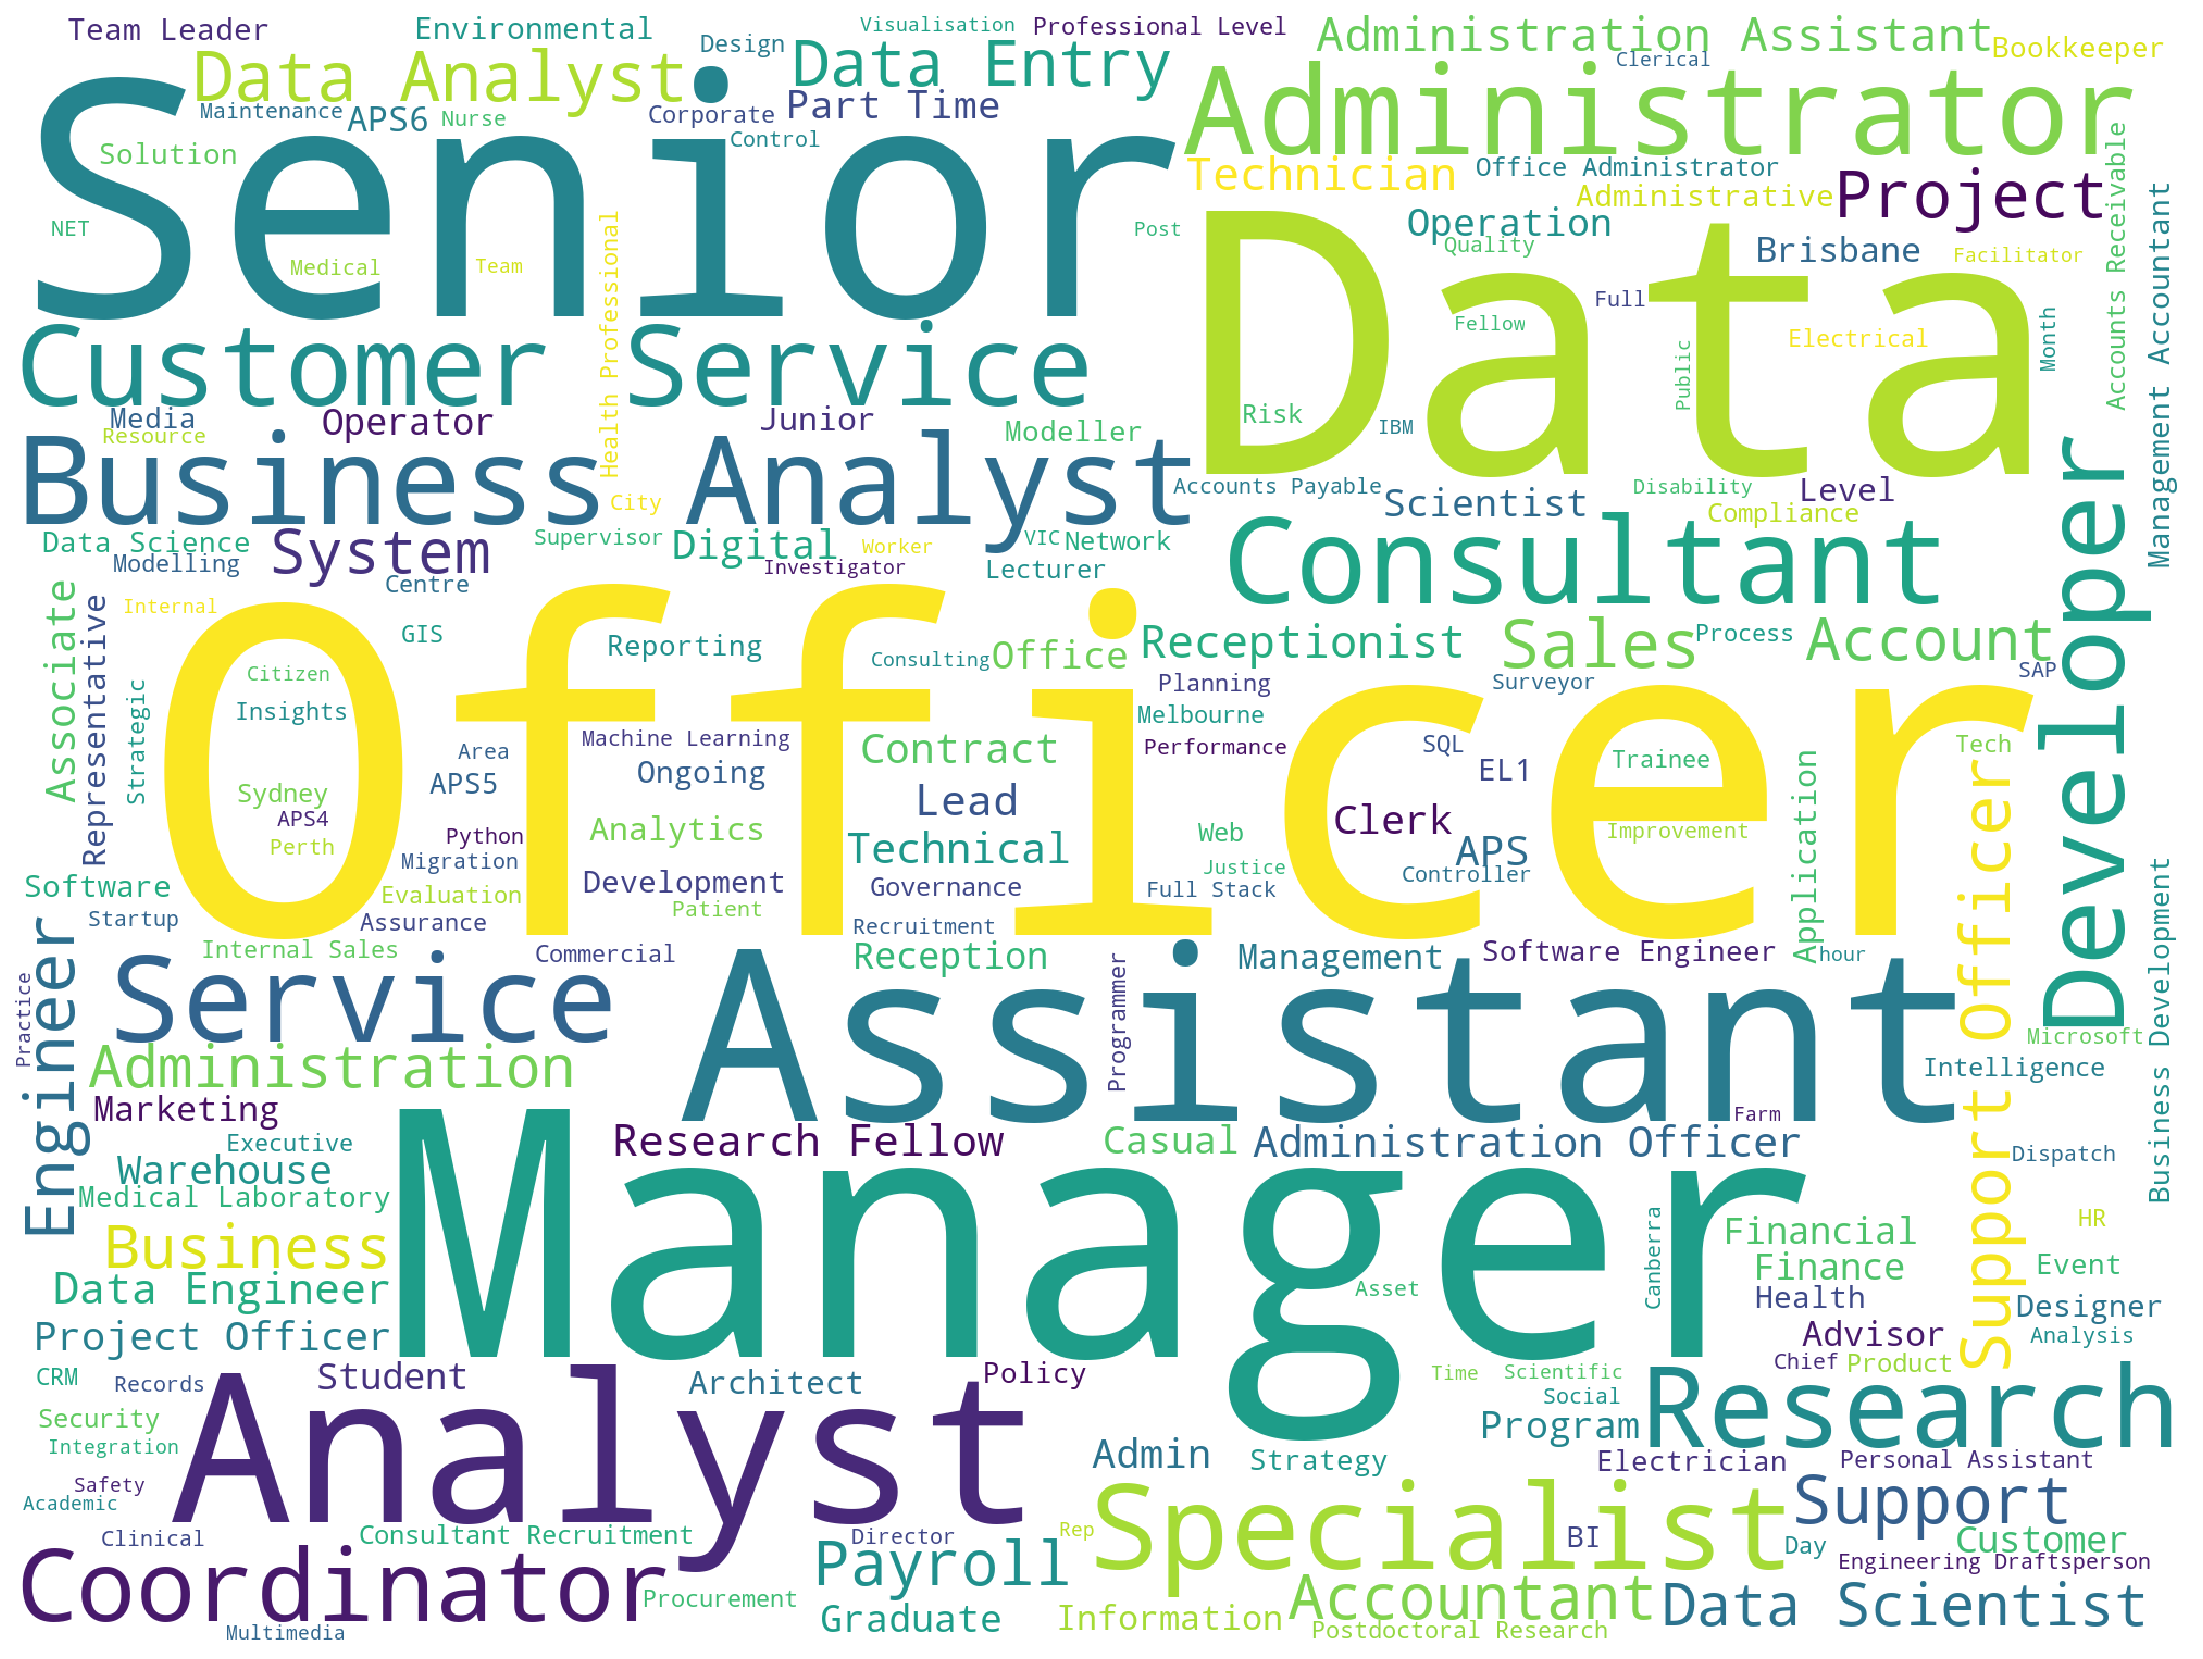

In [10]:
#Generate wordcloud for job title, funny thing officer is 
#the most mentioned word. this indicate the search algo from indeed is not that accurate
from wordcloud import WordCloud, STOPWORDS

jd_string = ' '.join(final_job2['job_title'])

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white', height = 1500, width = 2000).generate(jd_string)

plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [15]:
final_job2.mean_anual.describe()

count      1034.000000
mean      83504.150338
std       40000.967274
min       21307.500000
25%       55000.000000
50%       72753.500000
75%       99558.000000
max      300000.000000
Name: mean_anual, dtype: float64

In [16]:
#Generating salary rank classification targets
def salaryrank(x):
    if x < 55000:
        return '0.0'
    elif x < 72753.5:
        return '1.0'
    else:
        return '2.0'
    
final_job2['salaryrank'] = [salaryrank(i) for i in final_job2.mean_anual.values]

In [17]:
final_job2.head(10).T

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,0,1,2,3,4,5,6,7,8,9
Unnamed: 0.1,0,1,2,3,4,5,6,7,8,9
job_title,Data Associate,HSE Supervisor / Safety Officer Solar Farm - C...,Data Analytics Graduate,Privacy and Data Protection Specialist,Technology Specialist- Data Vault,Reception / Admin,Data Analyst,Data Integrity Officer,Investigator,Health Information Services Clerk
location,Melbourne VIC,Cohuna VIC,Frankston VIC,Melbourne VIC,Melbourne VIC,Melbourne VIC,Melbourne VIC,Albury-Wodonga VIC,Ballarat VIC,Melbourne VIC
work_type,Permanent,"Contract, Casual",Permanent,NaN,NaN,NaN,NaN,NaN,NaN,Part-time
company_name,Inflo APAC Limited,Workfast Pty Ltd,Frankston City Council,PwC,Cognizant Technology Solutions,LJ Hooker Hampton Park,Publicis Emil,Charles Sturt University,Victorian Government,St Vincent's Hospital Melbourne
company_rating,Not Available,4.5,3,4,3.9,3.7,Not Available,4.1,3.5,4.2
salary,"$50,000 - $59,999 a year",$45 an hour,"$61,648 - $77,513 a year","$85,000 a year","$100,000 - $149,000 a year","$35,000 - $50,000 a year","$70,000 - $90,000 a year","$76,280 - $82,547 a year","$68,884 a year","$53,242 a year"
desc,"THE COMPANYInflo is an agile, forward-thinking...",Workfast is seeking an experienced HSE Safety ...,Data Analytics Graduate\n\nPermanent Full Time...,Line of Service\nAssurance\nIndustry/Sector\nN...,About CognizantCognizant (Nasdaq-100: CTSH) is...,"Our award winning team is very driven, enthusi...",An exciting new opportunity has emerged to wor...,Join a customer-centric team focused on delive...,Reference: VG/SRO/INVBTPINV/0819\nGain invalua...,Excellent benefits including salary packaging\...
rate_type,year,hour,year,year,year,year,year,year,year,year


In [18]:
final_job2['company_rating']=final_job2['company_rating'].fillna('Not Available')
final_job2.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Unnamed: 0.1,0,1,2,3,4
job_title,Data Associate,HSE Supervisor / Safety Officer Solar Farm - C...,Data Analytics Graduate,Privacy and Data Protection Specialist,Technology Specialist- Data Vault
location,Melbourne VIC,Cohuna VIC,Frankston VIC,Melbourne VIC,Melbourne VIC
work_type,Permanent,"Contract, Casual",Permanent,NaN,NaN
company_name,Inflo APAC Limited,Workfast Pty Ltd,Frankston City Council,PwC,Cognizant Technology Solutions
company_rating,Not Available,4.5,3,4,3.9
salary,"$50,000 - $59,999 a year",$45 an hour,"$61,648 - $77,513 a year","$85,000 a year","$100,000 - $149,000 a year"
desc,"THE COMPANYInflo is an agile, forward-thinking...",Workfast is seeking an experienced HSE Safety ...,Data Analytics Graduate\n\nPermanent Full Time...,Line of Service\nAssurance\nIndustry/Sector\nN...,About CognizantCognizant (Nasdaq-100: CTSH) is...
rate_type,year,hour,year,year,year


In [19]:
#Generating a columns which will include all the job information as a text column for NLP
final_job2['total'] = 'Location:'+ final_job2['location'] + ', '  \
                    + 'Company name:' + final_job2['company_name'] + ', '\
                    + 'Company rating:' + final_job2['company_rating'].astype(str) + ', '\
                    + 'Pay frequency:' + final_job2['rate_type'] + ', '\
                    + 'State:' + final_job2['state'] + ', '\
                    + 'JobTitle and ' + 'JobDescription:' + final_job2['titlendesc']

In [20]:
# import re
# final_job2['total'] = final_job2['total'].apply(lambda x: re.sub(r'([a-z](?=[A-Z])|[A-Z](?=[A-Z][a-z]))', r'\1 ', x\
#       .replace(':',': ').replace(')',') ')))
final_job2['total'][0]

"Location:Melbourne VIC, Company name:Inflo APAC Limited, Company rating:Not Available, Pay frequency:year, State:VIC, JobTitle and JobDescription:Data Associate THE COMPANYInflo is an agile, forward-thinking company that leverages the latest technology to revolutionise the world of accounting.Inflo abides by a set of core values that informs everything we do:Treat Inflo as if it was your own businessDo what you say you'll doContinually improve yourself and InfloCreate a positive, open and honest environmentProactively drive the long-term success of partners and customersBe passionate and celebrate the success of the teamInflo's success is built on its people and dependent on everybody working towards our shared objectives and within our cultural values.THE TEAMInflo's Data Team, currently based in the UK, are looking to expand into Australia in order to provide support to our clients who are in significantly different time-zones to the UK.We're looking for more people with entrepreneu

## Data Cleaning and feature engineering is not needed:
* Fastai will take care of the feature normalization and engineering by using embedding technique for categorical data
* Loaded the fastai library
* Time constrain, no other models were attemped. However data was shared with other classmates, so model performances can be reviewed and compared
* First train the language model NLP part to learn the context (learner 1) for text feature engineering
* Second using regression to pitch context agaisnt the salary classification (classification learner 2)
* Third use another tabular learner to include more features for linear regression (tabular linear learner 3) 
* After three leaners, the accuracy and confusion matrix were plotted, accuracy > 70%, question 1 answered
* Use language model to predict skill key words for specific salaries, question 2 answered

In [57]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# import all the modules for text and tabular data from fastai, sometimes the import * will not work properly
#so everything should be reimported separately
from fastai import *
from fastai.text import *
#data block is the fastai data loader, it create the data object which is specified class for each type of learning, i.e
#text, image or tabular data
from fastai.data_block import *
# from torchtext import vocab, data, datasets
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
n = len(final_job2)

In [59]:
#Create validation dataset with random split
def get_cv_idxs(n, cv_idx=0, val_pct=0.5, seed=42):
    """ Get a list of index values for Validation set from a dataset
    
    Arguments:
        n : int, Total number of elements in the data set.
        cv_idx : int, starting index [idx_start = cv_idx*int(val_pct*n)] 
        val_pct : (int, float), validation set percentage 
        seed : seed value for RandomState
        
    Returns:
        list of indexes 
    """
    np.random.seed(seed)
    n_val = int(val_pct*n)
    idx_start = cv_idx*n_val
    idxs = np.random.permutation(n)
    return idxs[idx_start:idx_start+n_val]

In [60]:
val_idx = get_cv_idxs(n, val_pct=0.4)
val_idx

array([294, 453, 638, 139, ..., 193, 432, 743, 578])

In [61]:
#check the if the random split has class imbalance, conclusion no class imbalance
final_job2.salaryrank[val_idx].value_counts()

2.0    202
0.0    108
1.0    103
Name: salaryrank, dtype: int64

In [62]:
#Creating a data file which will only be loaded by the NLP language model.
final_job2[['total','salaryrank']].to_csv('fj2.csv', encoding='utf-8')

In [63]:
#Create databunch for trainning the language model
bs=36
data_lm = (TextList.from_csv('./', 'fj2.csv', cols='total')
           #Inputs: all the text files in path
            #.filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_idx(val_idx)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
#Save the databunch for reuse in case notebook get reboot
data_lm.save('data_lm.pkl')

In [28]:
#Load the data bunch
data_lm = load_data('./', 'data_lm.pkl', bs=bs)

In [30]:
#preview the databunch, it is best to print out a single item, I have noticed that previously the text were not correctly populated using \n
data_lm.show_batch()

idx,text
0,"to join their team and co - ordinate all safety protocols during the development of the xxmaj solar xxmaj farm in xxmaj cohuna xxup vic . xxmaj the successful candidate will be responsible for provision of xxmaj safety xxmaj processes and xxmaj protocols during the xxmaj installation of xxmaj solar xxmaj energy xxmaj systems . xxmaj responsibilities : xxmaj to review and provide safety advice , assistance and support to"
1,"be required to complete the xxup xxunk requirements of the organisation , which may include local level training relating to equipment usage and xxmaj xxunk xxmaj chemicals . \n xxmaj the position may require you to work outside the xxunk hours ; overtime will be paid in accordance with the relevant xxmaj victorian xxmaj public xxmaj service xxmaj agreement . \n xxmaj successful candidates will be required to"
2,"xxmaj applications which do not systematically address the selection criteria will not be considered . xxbos xxmaj location : xxmaj xxunk xxup vic xxunk , xxmaj company name : xxmaj xxunk xxmaj jones xxmaj australia , xxmaj company rating : xxmaj not xxmaj available , xxmaj pay frequency : hour , xxmaj state : xxup vic , jobtitle and jobdescription : xxmaj bookkeeper - xxmaj part xxmaj time xxmaj we"
3,"surveys , coordinate compliance reporting activities and provide advice on data - related issues . \n \n xxmaj the xxmaj strategic xxmaj intelligence and xxmaj planning xxmaj unit ( xxup sipu ) xxmaj team : \n \n xxmaj you will work with a collaborative , inclusive and happy team who work hard to ensure they have a fantastic culture . xxup sipu staff have high - level skills"
4,"highly regarded : \n \n xxmaj machine learning ( image classification a bonus ! ) \n xxmaj extensive coding experience ( particularly xxmaj python / xxup .net xxmaj core ) \n a focus on applied research \n xxmaj if you are enthusiastic at the prospect of taking on an important and ground - breaking challenge that does demonstrable social good , we strongly encourage you to"


In [31]:
#creating the language model using AWS_LSTM architect 
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.4)

In [32]:
#trial run to find the learning rate
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.75E-02
Min loss divided by 10: 2.09E-02
0.02089296130854041


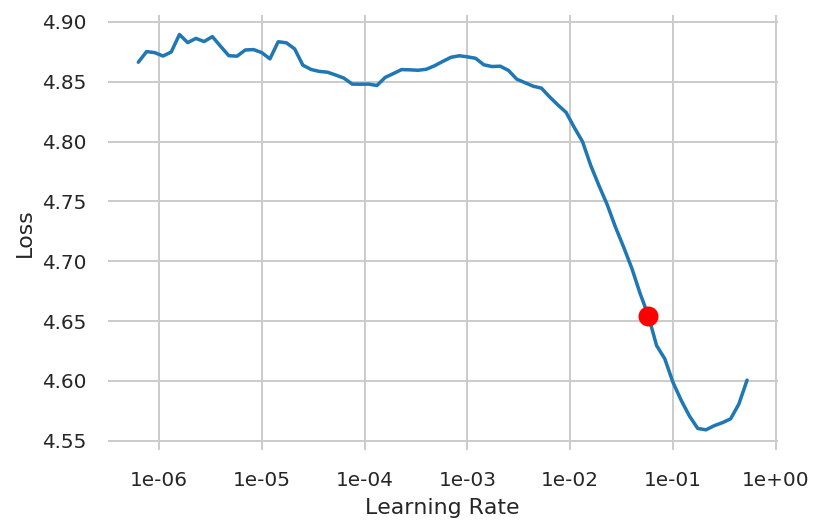

In [33]:
#withdraw the best learning rate from the recorder.
learn.recorder.plot(skip_end=15,suggestion=True)
lrs = learn.recorder.lrs
losses = learn.recorder.losses
mg = (np.gradient(np.array(losses))).argmin()
ml = np.argmin(losses)
min_grad_lr = lrs[mg]
min_loss_lr = lrs[ml]/10
print(min_loss_lr)
# min_loss_lr = 3.02e-2

In [34]:
#use discrimitative learning rate and optimizer to train the model
learn.fit_one_cycle(7, min_loss_lr)

epoch,train_loss,valid_loss,accuracy,time
0,3.818214,3.307524,0.376798,00:22
1,3.149640,3.064918,0.409582,00:23
2,2.812889,2.969333,0.432395,00:23
3,2.530727,2.907719,0.446131,00:24
4,2.328887,2.850202,0.458784,00:25
5,2.135578,2.816698,0.465761,00:24
6,1.969967,2.810902,0.467125,00:49


In [108]:
# learn.save('fit_head')

In [109]:
# learn.load('fit_head')
# learn.unfreeze()
# learn.fit_one_cycle(4, 1e-3, moms=(0.85,0.7))

In [35]:
#save the language model
learn.save('fine_tuned')
learn.load('fine_tuned')
#save the language model encoder
learn.save_encoder('fine_tuned_enc')

In [36]:
#create classification for the encoded data
data_clas = (TextList.from_csv('./', 'fj2.csv', cols='total')
             #grab all the text files in path
             .split_by_idx(val_idx)
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_df(cols='salaryrank',label_cls=FloatList)
             #label them all with their folders
             .databunch(bs=bs))

#save the data class object for later reuse.
data_clas.save('data_clas.pkl')

In [37]:
data_clas = load_data('./', 'data_clas.pkl', bs=bs)
data_clas.show_batch()

text,target
"xxbos xxmaj location : xxmaj queanbeyan xxup nsw 2620 , xxmaj company name : xxmaj queanbeyan - xxmaj palerang xxmaj regional xxmaj council , xxmaj company rating : xxmaj not xxmaj available , xxmaj pay frequency : week , xxmaj state : xxup nsw , jobtitle and jobdescription : xxmaj program xxmaj coordinator - xxmaj environmental xxmaj health xxmaj application xxmaj information xxmaj pack \n \n xxmaj program xxmaj",2.0
"xxbos xxmaj location : xxmaj queanbeyan xxup nsw 2620 , xxmaj company name : xxmaj queanbeyan - xxmaj palerang xxmaj regional xxmaj council , xxmaj company rating : xxmaj not xxmaj available , xxmaj pay frequency : week , xxmaj state : xxup nsw , jobtitle and jobdescription : xxmaj foreman xxmaj concreting and xxmaj footpaths ( xxmaj ongoing ) xxmaj application xxmaj information xxmaj pack \n \n xxmaj",1.0
"xxbos xxmaj location : xxmaj queanbeyan xxup nsw 2620 , xxmaj company name : xxmaj queanbeyan - xxmaj palerang xxmaj regional xxmaj council , xxmaj company rating : xxmaj not xxmaj available , xxmaj pay frequency : week , xxmaj state : xxup nsw , jobtitle and jobdescription : xxmaj waste xxmaj operator ( xxmaj ongoing ) xxmaj application xxmaj information xxmaj pack \n \n xxmaj part - time",0.0
"xxbos xxmaj location : xxmaj queanbeyan xxup nsw 2620 , xxmaj company name : xxmaj queanbeyan - xxmaj palerang xxmaj regional xxmaj council , xxmaj company rating : xxmaj not xxmaj available , xxmaj pay frequency : hour , xxmaj state : xxup nsw , jobtitle and jobdescription : xxmaj casual xxmaj sport and xxmaj recreation xxmaj facilitators xxmaj application xxmaj information xxmaj pack \n \n xxmaj casual xxmaj",0.0
"xxbos xxmaj location : xxmaj queanbeyan xxup nsw 2620 , xxmaj company name : xxmaj queanbeyan - xxmaj palerang xxmaj regional xxmaj council , xxmaj company rating : xxmaj not xxmaj available , xxmaj pay frequency : week , xxmaj state : xxup nsw , jobtitle and jobdescription : xxmaj part - time xxmaj customer xxmaj service xxmaj officers ( xxmaj ongoing ) xxmaj application xxmaj information xxmaj pack \n",0.0


In [64]:
#This part is copied from github, search on ranger optimizer then you will be able to find it
import math
import torch
from torch.optim.optimizer import Optimizer, required
import itertools as it
#from torch.optim import Optimizer
#credit - Lookahead implementation from LonePatient - https://github.com/lonePatient/lookahead_pytorch/blob/master/optimizer.py
#credit2 - RAdam code by https://github.com/LiyuanLucasLiu/RAdam/blob/master/radam.py


class Ranger(Optimizer):
    
    def __init__(self, params, lr=1e-3, alpha=0.5, k=6, betas=(.9,0.999), eps=1e-8, weight_decay=0):
        #parameter checks
        if not 0.0 <= alpha <= 1.0:
            raise ValueError(f'Invalid slow update rate: {alpha}')
        if not 1 <= k:
            raise ValueError(f'Invalid lookahead steps: {k}')
        if not lr > 0:
            raise ValueError(f'Invalid Learning Rate: {lr}')
        if not eps > 0:
            raise ValueError(f'Invalid eps: {eps}')
        
        #prep defaults and init torch.optim base
        defaults = dict(lr=lr, betas=betas, eps=eps, weight_decay=weight_decay)
        super().__init__(params,defaults)
        
        #now we can get to work...
        for group in self.param_groups:
            group["step_counter"] = 0
            #print("group step counter init")
                      
        #look ahead params
        self.alpha = alpha
        self.k = k 
        
        #radam buffer for state
        self.radam_buffer = [[None,None,None] for ind in range(10)]
        
        #lookahead weights
        self.slow_weights = [[p.clone().detach() for p in group['params']]
                                for group in self.param_groups]
        
        #don't use grad for lookahead weights
        for w in it.chain(*self.slow_weights):
            w.requires_grad = False
        
    def __setstate__(self, state):
        print("set state called")
        super(Ranger, self).__setstate__(state)
       
        
    def step(self, closure=None):
        loss = None
        #note - below is commented out b/c I have other work that passes back the loss as a float, and thus not a callable closure.  
        #Uncomment if you need to use the actual closure...
        
        #if closure is not None:
            #loss = closure()
            
        #------------ radam
        for group in self.param_groups:
    
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data.float()
                if grad.is_sparse:
                    raise RuntimeError('RAdam does not support sparse gradients')
    
                p_data_fp32 = p.data.float()
    
                state = self.state[p]
    
                if len(state) == 0:
                    state['step'] = 0
                    state['exp_avg'] = torch.zeros_like(p_data_fp32)
                    state['exp_avg_sq'] = torch.zeros_like(p_data_fp32)
                else:
                    state['exp_avg'] = state['exp_avg'].type_as(p_data_fp32)
                    state['exp_avg_sq'] = state['exp_avg_sq'].type_as(p_data_fp32)
    
                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']
    
                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                exp_avg.mul_(beta1).add_(1 - beta1, grad)
    
                state['step'] += 1
                buffered = self.radam_buffer[int(state['step'] % 10)]
                if state['step'] == buffered[0]:
                    N_sma, step_size = buffered[1], buffered[2]
                else:
                    buffered[0] = state['step']
                    beta2_t = beta2 ** state['step']
                    N_sma_max = 2 / (1 - beta2) - 1
                    N_sma = N_sma_max - 2 * state['step'] * beta2_t / (1 - beta2_t)
                    buffered[1] = N_sma
                    if N_sma > 5:
                        step_size = group['lr'] * math.sqrt((1 - beta2_t) * (N_sma - 4) / (N_sma_max - 4) * (N_sma - 2) / N_sma * N_sma_max / (N_sma_max - 2)) / (1 - beta1 ** state['step'])
                    else:
                        step_size = group['lr'] / (1 - beta1 ** state['step'])
                    buffered[2] = step_size
    
                if group['weight_decay'] != 0:
                    p_data_fp32.add_(-group['weight_decay'] * group['lr'], p_data_fp32)
    
                if N_sma > 5:                    
                    denom = exp_avg_sq.sqrt().add_(group['eps'])
                    p_data_fp32.addcdiv_(-step_size, exp_avg, denom)
                else:
                    p_data_fp32.add_(-step_size, exp_avg)
    
                p.data.copy_(p_data_fp32)
        
        
        #---------------- end radam step
        
        #look ahead tracking and updating if latest batch = k
        for group,slow_weights in zip(self.param_groups,self.slow_weights):
            group['step_counter'] += 1
            if group['step_counter'] % self.k != 0:
                continue
            for p,q in zip(group['params'],slow_weights):
                if p.grad is None:
                    continue
                q.data.add_(self.alpha,p.data - q.data)
                p.data.copy_(q.data)
            
        
            
        return loss



In [65]:
#initiate callbacks
from fastai.callbacks import *

In [66]:
#initiate the optimizer instance
optar = partial(Ranger)
#redefine the measuring metrics using negative mean absolute error
def mean_absolute_error(pred:Tensor, targ:Tensor)->Rank0Tensor:
    "Mean absolute error between `pred` and `targ`."
    pred,targ = flatten_check(pred,targ)
    return -(torch.abs(targ - pred).mean())

In [67]:
#Build the deep learning model for the classification problem
learn = text_classifier_learner(data_clas, AWD_LSTM,loss_func = MSELossFlat(), 
                                opt_func = optar,
                                callback_fns = [
                                #partial(EarlyStoppingCallback, monitor='mean_absolute_error', min_delta=0.001, patience=2),
                                partial(ReduceLROnPlateauCallback),
#                               partial(GradientClipping, clip=0.2),
                                partial(SaveModelCallback, every = 'improvement', monitor='mean_absolute_error', name='bestmodel')],
                                metrics=[mean_absolute_error,r2_score], drop_mult=0.6)
#load the encoder information
learn.load_encoder('fine_tuned_enc');

In [68]:
#trial run to find the learning rate on the last layer
learn.lr_find()

set state called
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 4.37E-01
Min loss divided by 10: 3.31E-01


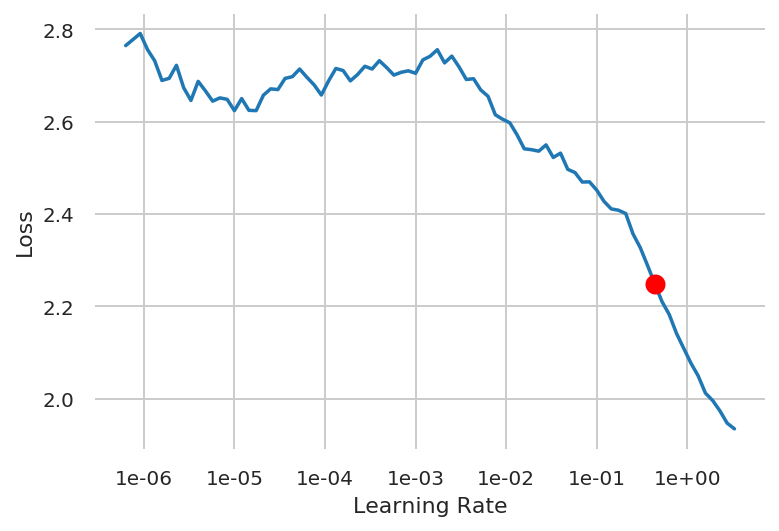

In [69]:
#plot the learning rate and get ready for next round training
learn.recorder.plot(suggestion=True)

In [44]:
#withdraw the learning rate from the tensor
lrs = learn.recorder.lrs
losses = learn.recorder.losses
mg = (np.gradient(np.array(losses))).argmin()
ml = np.argmin(losses)
min_grad_lr = lrs[mg]
min_loss_lr = lrs[ml]/10

In [45]:
#start the training cycle
learn.fit_one_cycle(10,min_loss_lr)

epoch,train_loss,valid_loss,mean_absolute_error,r2_score,time
0,1.021541,0.536268,-0.643236,0.150013,00:39
1,0.611707,0.473579,-0.612435,0.228067,00:37
2,0.485266,0.396253,-0.491131,0.373966,00:38
3,0.428579,0.613530,-0.615393,-0.014953,00:37
4,0.390660,0.355251,-0.453534,0.431145,00:39
5,0.368635,0.319042,-0.435105,0.479498,00:37
6,0.338062,0.375254,-0.465783,0.391001,00:37
7,0.309958,0.320583,-0.447604,0.476798,00:39
8,0.290102,0.322143,-0.426396,0.475870,00:24
9,0.273379,0.324129,-0.427337,0.473026,00:19


Better model found at epoch 0 with mean_absolute_error value: -0.6432355642318726.
Better model found at epoch 1 with mean_absolute_error value: -0.6124348044395447.
Better model found at epoch 2 with mean_absolute_error value: -0.49113088846206665.
Epoch 3: reducing lr to 0.09098610943437152
Better model found at epoch 4 with mean_absolute_error value: -0.4535340964794159.
Better model found at epoch 5 with mean_absolute_error value: -0.43510499596595764.
Epoch 6: reducing lr to 0.03721272177006376
Epoch 7: reducing lr to 0.018021221910106414
Epoch 8: reducing lr to 0.004740291934229954
Better model found at epoch 8 with mean_absolute_error value: -0.4263959228992462.
Epoch 9: reducing lr to 3.8290407385811047e-07
set state called


set state called


set state called
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.75E-09
Min loss divided by 10: 1.32E-09


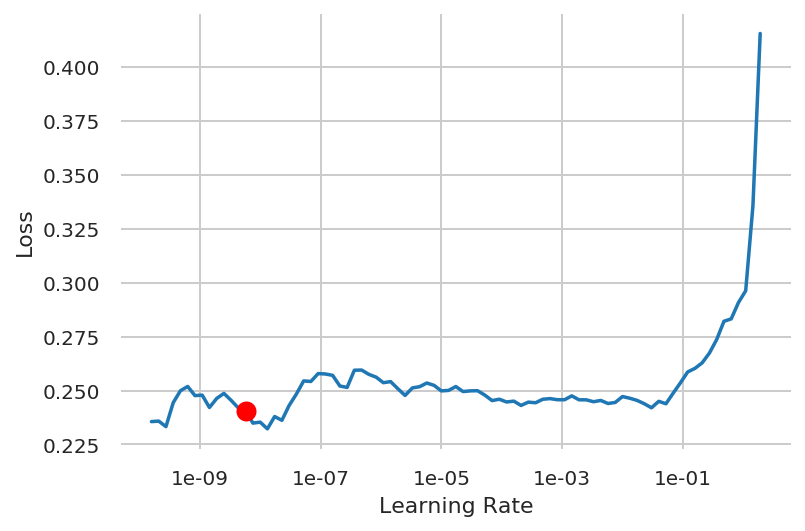

In [46]:
learn.save('first')
learn.load('first');
learn.freeze_to(-2)
learn.lr_find(start_lr=1e-11)
learn.recorder.plot(suggestion=True)
lrs = learn.recorder.lrs
losses = learn.recorder.losses
mg = (np.gradient(np.array(losses))).argmin()
ml = ml = np.argmin(losses)
min_grad_lr = lrs[mg]
min_loss_lr = lrs[ml]/10

In [47]:
#train the last two layers
learn.freeze_to(-2)
learn.fit_one_cycle(10, slice(min_grad_lr,min_loss_lr))
#learn.fit_one_cycle(4, 4.37e-2, moms=(0.85,0.75))

epoch,train_loss,valid_loss,mean_absolute_error,r2_score,time
0,0.250018,0.322309,-0.425064,0.476531,00:21
1,0.247510,0.321194,-0.424816,0.478140,00:22
2,0.247910,0.319369,-0.422454,0.481820,00:37
3,0.239430,0.316442,-0.424342,0.486221,00:43
4,0.247583,0.319968,-0.424996,0.479994,00:20
5,0.242893,0.318049,-0.424172,0.483155,00:37
6,0.240072,0.315705,-0.423185,0.487562,00:46
7,0.238048,0.319708,-0.424394,0.482440,00:47
8,0.236071,0.323363,-0.426735,0.474219,00:43
9,0.240483,0.322477,-0.425124,0.476600,00:44


Better model found at epoch 0 with mean_absolute_error value: -0.4250635802745819.
Better model found at epoch 1 with mean_absolute_error value: -0.42481550574302673.
Better model found at epoch 2 with mean_absolute_error value: -0.42245423793792725.
Epoch 4: reducing lr to 2.1401783566263039e-13
Epoch 5: reducing lr to 1.6116005588822546e-13
Epoch 7: reducing lr to 4.963456665404176e-14
Epoch 8: reducing lr to 1.3055848107458534e-14
Epoch 9: reducing lr to 1.054605390845125e-18
set state called


In [123]:
# learn.save('second')
# learn.load('second');
# learn.freeze_to(-3)
# learn.fit_one_cycle(1, slice(4e-3/(2.6**4),4e-3), moms=(0.85,0.75))

In [48]:
#train all the layers, load the model, unfreeze layers, find learning rate and unfreeze everything then train. you need to 
#unfreeze twice because finding the learning rate will reset the first unfreeze
learn.save('third')
learn.load('third');

set state called
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.63E-10
Min loss divided by 10: 1.58E-11


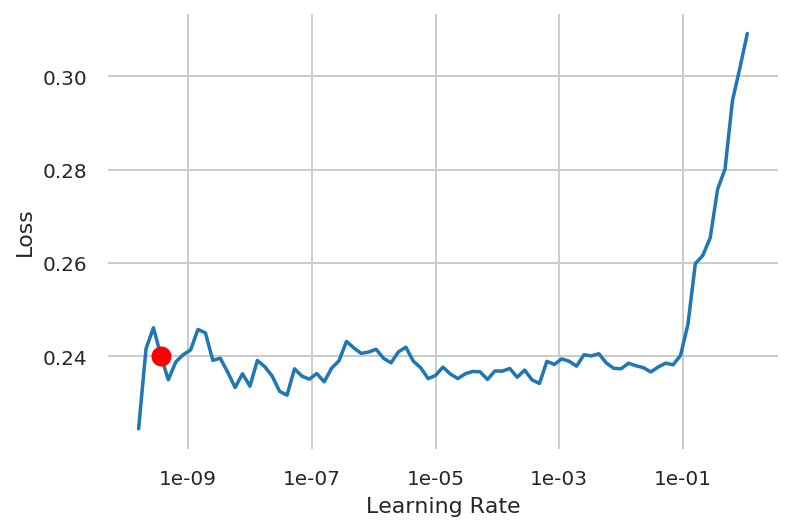

In [70]:
learn.load('bestmodel')
learn.unfreeze()
learn.lr_find(start_lr=1e-11)
learn.recorder.plot(suggestion=True)
lrs = learn.recorder.lrs
losses = learn.recorder.losses
mg = (np.gradient(np.array(losses))).argmin()
ml = np.argmin(losses)
min_grad_lr = lrs[mg]
min_loss_lr = lrs[ml]/10

In [71]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr = min_loss_lr*2)

epoch,train_loss,valid_loss,mean_absolute_error,r2_score,time
0,0.247641,0.318504,-0.422499,0.483480,00:36
1,0.247140,0.320161,-0.423609,0.480321,00:36


Better model found at epoch 0 with mean_absolute_error value: -0.42249882221221924.
Epoch 1: reducing lr to 2.7804813259990016e-18
set state called


In [72]:
#extract experience from job description
def findym(x):
    rx = "\\d+\\s+years?\\s+(?:and\\s*)?\\d+\\s+months?|\\d+\\s+(?:months?|years?)";
    m = re.search(rx, x)
    return m

final_job2['experience'] = [findym(i)[0] if findym(i) is not None else 'Not Available' for i in final_job2.total.values]

In [73]:
final_job2.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Unnamed: 0.1,0,1,2,3,4
job_title,Data Associate,HSE Supervisor / Safety Officer Solar Farm - C...,Data Analytics Graduate,Privacy and Data Protection Specialist,Technology Specialist- Data Vault
location,Melbourne VIC,Cohuna VIC,Frankston VIC,Melbourne VIC,Melbourne VIC
work_type,Permanent,"Contract, Casual",Permanent,NaN,NaN
company_name,Inflo APAC Limited,Workfast Pty Ltd,Frankston City Council,PwC,Cognizant Technology Solutions
company_rating,Not Available,4.5,3,4,3.9
salary,"$50,000 - $59,999 a year",$45 an hour,"$61,648 - $77,513 a year","$85,000 a year","$100,000 - $149,000 a year"
desc,"THE COMPANYInflo is an agile, forward-thinking...",Workfast is seeking an experienced HSE Safety ...,Data Analytics Graduate\n\nPermanent Full Time...,Line of Service\nAssurance\nIndustry/Sector\nN...,About CognizantCognizant (Nasdaq-100: CTSH) is...
rate_type,year,hour,year,year,year


In [74]:
learn.load('bestmodel');

set state called


In [75]:
[float(learn.predict(i)[0].obj) for i in final_job2.total.values[0:10]]

[1.2181618213653564,
 1.1895873546600342,
 1.3778913021087646,
 2.193824052810669,
 1.4028029441833496,
 0.1646876335144043,
 1.6877907514572144,
 2.0617594718933105,
 1.0574021339416504,
 0.6528239846229553]

In [76]:
#Predicting the text and salary associate score
final_job2['textpredictionscore'] = [float(learn.predict(i)[0].obj) for i in final_job2.total.values]

In [77]:
final_job2 = final_job2.drop(columns = 'Unnamed: 0')

In [116]:
final_job2['company_rating'] = [np.NaN if i == 'Not Available' else float(i) for i in final_job2.company_rating.values]

In [117]:
final_job2.head().T

,0,1,2,3,4
Unnamed: 0.1,0,1,2,3,4
job_title,Data Associate,HSE Supervisor / Safety Officer Solar Farm - C...,Data Analytics Graduate,Privacy and Data Protection Specialist,Technology Specialist- Data Vault
location,Melbourne VIC,Cohuna VIC,Frankston VIC,Melbourne VIC,Melbourne VIC
work_type,Permanent,"Contract, Casual",Permanent,NaN,NaN
company_name,Inflo APAC Limited,Workfast Pty Ltd,Frankston City Council,PwC,Cognizant Technology Solutions
company_rating,NaN,4.5,3,4,3.9
salary,"$50,000 - $59,999 a year",$45 an hour,"$61,648 - $77,513 a year","$85,000 a year","$100,000 - $149,000 a year"
desc,"THE COMPANYInflo is an agile, forward-thinking...",Workfast is seeking an experienced HSE Safety ...,Data Analytics Graduate\n\nPermanent Full Time...,Line of Service\nAssurance\nIndustry/Sector\nN...,About CognizantCognizant (Nasdaq-100: CTSH) is...
rate_type,year,hour,year,year,year
min,50000,45,61648,85000,100000


In [118]:
#save the job data as backup again
final_job2.to_csv('fjobdata.csv', encoding='utf-8')

In [119]:
len(final_job2)

1034

In [120]:
#build tabular datamodel
from fastai.tabular import *

In [121]:
tabular_learner

<function fastai.tabular.data.tabular_learner(data: fastai.basic_data.DataBunch, layers: Collection[int], emb_szs: Dict[str, int] = None, metrics=None, ps: Collection[float] = None, emb_drop: float = 0.0, y_range: Union[Tuple[float, float], NoneType] = None, use_bn: bool = True, **learn_kwargs)>

In [122]:
#defind the target, numeric and categorical variables
dep_var = 'salaryrank'
cat_names = ['state', 'experience', 'rate_type']
cont_names = ['company_rating','textpredictionscore']
procs = [FillMissing, Categorify, Normalize]

In [123]:
#generate some testdata incase we want to check how well the model is doing by viewing the confusion matrix
test = TabularList.from_df(final_job2.iloc[val_idx].copy(), path='./', cat_names=cat_names, cont_names=cont_names)

In [124]:
#creating databunch
data = (TabularList.from_df(final_job2, path='./', cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(val_idx)
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [125]:
#preview data
data.show_batch(rows=10)

state,experience,rate_type,company_rating_na,company_rating,textpredictionscore,target
WA,Not Available,hour,False,-0.9882,0.5513,2.0
ACT,Not Available,year,False,-2.8374,-0.4004,1.0
ACT,Not Available,year,False,-0.7571,0.9970,2.0
VIC,Not Available,year,False,0.6298,1.3840,2.0
VIC,24 months,year,False,0.1675,0.8383,2.0
NSW,3 years,year,True,0.1675,1.3014,2.0
VIC,Not Available,year,False,1.0921,1.2334,2.0
NSW,Not Available,year,True,0.1675,0.9591,2.0
VIC,12 month,hour,False,0.6298,0.2452,2.0
VIC,12 month,year,False,0.6298,0.8045,2.0


In [126]:
#build the tabular learning model
kappa = KappaScore()
kappa.weights = "quadratic"
learn = tabular_learner(data, layers=[500,100], metrics=[accuracy,FBeta(),kappa],
                        opt_func = optar,
                        callback_fns = [
                                partial(EarlyStoppingCallback, monitor='accuracy', min_delta=0.001, patience=3),
                                partial(ReduceLROnPlateauCallback),
#                               partial(GradientClipping, clip=0.2),
                                partial(SaveModelCallback, every = 'improvement', monitor='accuracy', name='bestfinal')],
                       )

In [127]:
#train the last layer
learn.fit_one_cycle(20, max_lr = 5e-2,wd=1e-1)

epoch,train_loss,valid_loss,accuracy,f_beta,kappa_score,time
0,0.987451,1.039828,0.493947,0.284090,0.022891,00:00
1,0.737073,0.900500,0.682809,0.554260,0.681690,00:00
2,0.613972,0.716001,0.692494,0.634449,0.727478,00:00
3,0.551673,0.688477,0.711864,0.670588,0.729675,00:00
4,0.513604,0.685768,0.709443,0.672402,0.739497,00:00
5,0.484881,0.693980,0.702179,0.670512,0.731090,00:00
6,0.455519,0.708065,0.711864,0.691821,0.734690,00:00
7,0.432443,0.743381,0.726392,0.698283,0.748546,00:00
8,0.419098,0.802347,0.685230,0.646840,0.670324,00:00
9,0.409340,0.826453,0.699758,0.676282,0.723843,00:00


Better model found at epoch 0 with accuracy value: 0.49394673109054565.


/opt/anaconda3/lib/python3.7/site-packages/fastai/metrics.py:189: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


Better model found at epoch 1 with accuracy value: 0.6828086972236633.
Better model found at epoch 2 with accuracy value: 0.6924939751625061.
Better model found at epoch 3 with accuracy value: 0.7118644118309021.
Epoch 5: reducing lr to 0.010000000000000002
Epoch 6: reducing lr to 0.009874640062350875
Epoch 7: reducing lr to 0.009504846320134739
Better model found at epoch 7 with accuracy value: 0.7263922691345215.
Epoch 8: reducing lr to 0.0089091617757105
Epoch 9: reducing lr to 0.008117456539497631
Epoch 10: reducing lr to 0.007169430017913009
Epoch 11: early stopping
Epoch 11: reducing lr to 0.006112620219362893
set state called


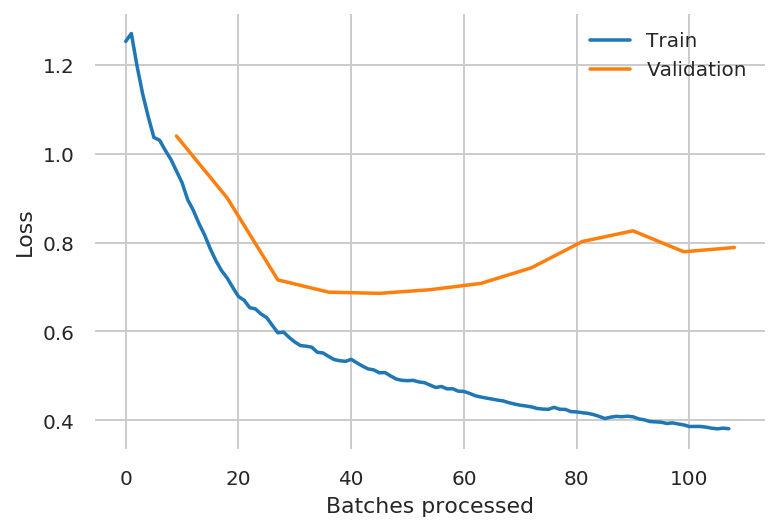

In [128]:
learn.recorder.plot_losses()

,Prediction,Actual,Loss,Probability,state,experience,rate_type,company_rating_na,company_rating,textpredictionscore
0,2.0,1.0,6.15,0.00,QLD,Available,year,False,0.3986,1.3385
1,2.0,1.0,5.43,0.00,QLD,Available,hour,True,0.1675,1.1996
2,2.0,0.0,5.26,0.01,NSW,years,day,False,-0.9882,1.0994
3,2.0,0.0,4.89,0.01,VIC,Available,week,True,0.1675,1.1194
4,2.0,1.0,4.85,0.01,QLD,years,hour,False,-0.2948,1.0015
5,2.0,1.0,4.47,0.01,VIC,Available,year,False,0.3986,1.0082
6,2.0,0.0,4.29,0.01,QLD,Available,day,False,-0.5259,0.9617
7,2.0,1.0,4.02,0.02,NSW,Available,year,False,0.8609,0.9661
8,2.0,1.0,4.02,0.02,ACT,Available,year,False,0.8609,1.1016
9,0.0,1.0,3.95,0.02,NSW,year,year,True,0.1675,-2.0643


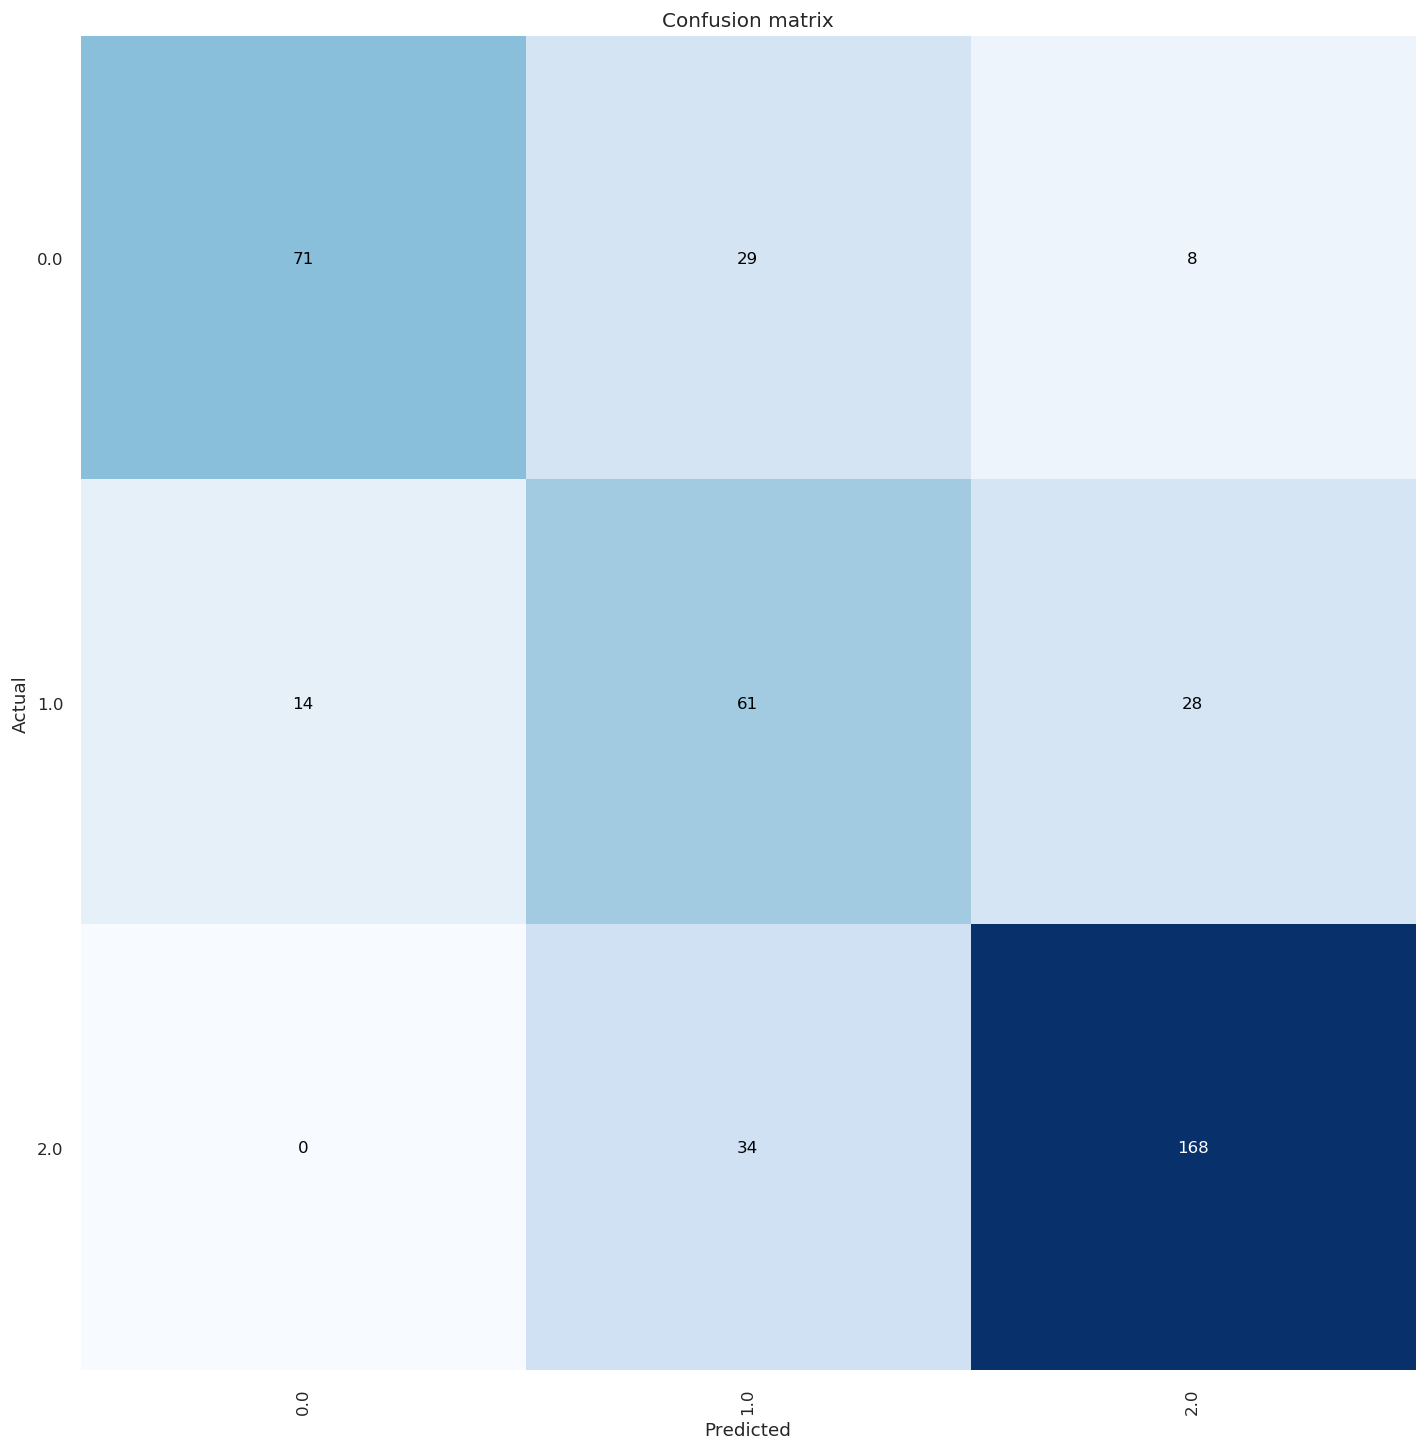

In [129]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
interp.plot_top_losses(16)

In [130]:
#Check language encoder prediction skills
learn2 = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.4)
learn2.load('fine_tuned');
TEXT = "As Data analyst, we required the following skills:"
N_WORDS = 100
N_SENTENCES = 20

In [131]:
learn2.predict(TEXT, N_WORDS, temperature=0.75)

'As Data analyst, we required the following skills: Extract , transform , transform , load , load , load , load , load , load and verify outcomes for each of the various Datasets . Data Warehouse stakeholders are required to process and perform data reporting and other data analysis to drive data identification , processing , and other data solutions . Data analytics will include data and business analysis . You are required to assess , assess and document data , identify needs and identify multiple issues . \n \n  Responding to data requests , analysing data and data management ,'

In [112]:
# learn2 = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.4)
# learn2.load('fine_tuned');
TEXT = "$80,000 a year, experienced, we required the following skills:"
N_WORDS = 100
N_SENTENCES = 20

In [115]:
learn2.predict(TEXT, N_WORDS, temperature=0.75)

'$80,000 a year, experienced, we required the following skills: Writing it , writing , writing code , and writing code for the Faculty of Art . Verbal and written communications are encouraged . \n \n  We value diversity and aim to build a workforce to support the diversity and inclusion of this individual . We are committed to making a difference , and actively listen to people and recognise their strength . We value diversity and strive to be inclusive of people and cultures , e.g. people , people with disability , and people who reflect the backgrounds of people and cultures .'